In [48]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
root = 'C:/Users/wonca/Documents/data/pandas_cookbook/'

## 불리언 통계량 계산
* boolean indexing(boolean selection): 불리언값으로 행을 선택하는 방법

In [5]:
# load & check data
file_name = 'movie.csv'
movie_df = pd.read_csv(root + file_name, index_col = 'movie_title')
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
# 상영시간이 2시간을 넘는 영화
movie_over_2h = movie_df['duration'] > 120
movie_over_2h.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [7]:
# 상영시간이 2시간 넘는 영화 수
movie_over_2h.sum()

1039

In [8]:
# 상영시간이 2시간 넘는 영화의 비율
movie_over_2h.mean()

0.2113506916192026

In [9]:
# 결측치를 제거
(movie_df['duration'].dropna() > 120).mean()

0.21199755152009794

In [10]:
# 기술통계량
movie_over_2h.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [11]:
movie_over_2h.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [13]:
# 배우 1이 배우 2보다 더 많은 좋아요를 받은 영화
actor_likes = movie_df[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
actor2_more_likes = actor_likes['actor_1_facebook_likes'] > actor_likes['actor_2_facebook_likes']
print(f'''
{actor2_more_likes}

ratio: {actor2_more_likes.mean()}
''')


movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     True
                                              ...  
Signed Sealed Delivered                        True
The Following                                  True
A Plague So Pleasant                          False
Shanghai Calling                               True
My Date with Drew                              True
Length: 4903, dtype: bool

ratio: 0.9777687130328371



## 다중 불리언 조건 구축
* |, &, ~ 는 비교연산자보다 우선순위가 높음

In [14]:
# criteria 1. imdb_score > 8
# criteria 2. content_rating == PG-13
# criteria 3. title_year < 2000 | title_year > 2009

cri1 = movie_df['imdb_score'] > 8
cri2 = movie_df['content_rating'] == 'PG-13'
cri3 = (movie_df['title_year'] < 2000) | (movie_df['title_year'] > 2009)

cri_chained = cri1 & cri2 & cri3
cri_chained.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

## 인덱스 선택을 통한 불리언 인덱싱 복제

In [16]:
file_name = 'college.csv'
college_df = pd.read_csv(root + file_name)
college_df.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [17]:
college_df[college_df['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [18]:
college2 = college_df.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [19]:
## boolean indexing vs index selection 속도
%timeit college_df[college_df['STABBR'] == 'TX']

2.24 ms ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit college2.loc['TX']

1.14 ms ± 42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
# isin
states = ['TX', 'CA', 'NY']
college_df[college_df['STABBR'].isin(states)].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860


## 정렬된 고유 인덱스를 사용한 선택
* 인덱스는 정렬돼있을 떄 성능이 좋음

In [24]:
# 인덱스 정렬 검사
college_df = pd.read_csv(root + file_name)
college2 = college_df.set_index('STABBR')
college2.index.is_monotonic  # 정렬 검사

False

In [25]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [27]:
# 1, 2, 3 에서 TX를 선택하는 시간 측정
%timeit college_df[college_df['STABBR'] == 'TX']

2.44 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit college2.loc['TX']  # index selecton

1.13 ms ± 49.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%timeit college3.loc['TX']  # sorted index selection

384 µs ± 26.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
# 복합 인덱스 사용
college_df.index = college_df['CITY'] + ', ' + college_df['STABBR']
college_df.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Normal, AL",Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
"Birmingham, AL",University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
"Montgomery, AL",Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
"Huntsville, AL",University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
"Montgomery, AL",Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [34]:
%%timeit
crit1 = college_df['CITY'] == 'Miami'
crit2 = college_df['STABBR'] == 'FL'
college_df[crit1 & crit2]

4.04 ms ± 220 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit college_df.loc['Miami, FL']

982 µs ± 55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 주가 전망

In [38]:
# load data
file_name = 'slb_stock.csv'
slb_df = pd.read_csv(root + file_name, index_col='Date', parse_dates=['Date'])
slb_df.headb

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [42]:
slb_close = slb_df['Close']  # 종가선택
slb_summary = slb_close.describe(percentiles = [.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [47]:
# 종가 하위 10%, 상위 10% 선택
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
crit = (slb_close > upper_10) | (slb_close < lower_10)
slb_top_bottom = slb_close[crit]
slb_top_bottom

Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
              ...  
2016-01-15    63.01
2016-01-19    62.82
2016-01-20    61.06
2016-01-21    61.45
2016-01-25    63.30
Name: Close, Length: 380, dtype: float64

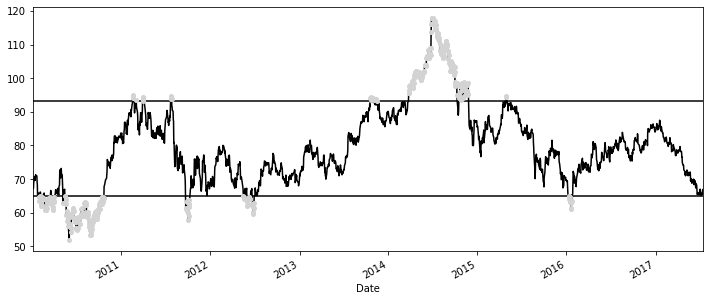

In [52]:
plt.figure(figsize = [12, 5])
slb_close.plot(color='k')
slb_top_bottom.plot(marker='o', ls=' ', ms=4, color='lightgray')
xmin = crit.index[0]
xmax = crit.index[-1]
plt.hlines(y = [lower_10, upper_10], xmin=xmin, xmax=xmax, color='k')

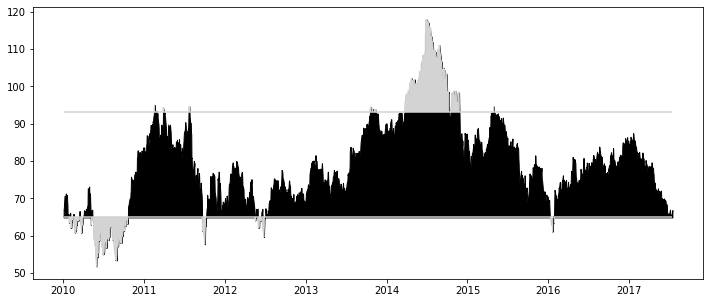

In [60]:
# fill between으로 채우기
plt.figure(figsize = [12, 5])
plt.hlines(y = [lower_10, upper_10], xmin=xmin, xmax=xmax, color = 'lightgray')
plt.fill_between(x=crit.index, y1=lower_10, y2=slb_close.values, color='k')
plt.fill_between(x=crit.index, y1=lower_10, y2=slb_close.values, where=slb_close < lower_10, color='lightgray')
plt.fill_between(x=crit.index, y1=upper_10, y2=slb_close.values, where=slb_close > upper_10, color='lightgray')
plt.show()

## SQL WHERE절 해석

In [79]:
# 기본급이 8~12만 달러 사이인 여성 경찰, 여성 공무원 선택
query = '''
SELECT
    unique_id,
    department,
    gender,
    base_salary
FROM
    employee
where
    department IN ('Houston Police Department-HPD', 'Houston Fire Department (HFD)') AND
    gender = 'Femail' AND
    base_salary BETWEEN 80000 AND 120000
'''

In [61]:
file_name = 'employee.csv'
employee_df = pd.read_csv(root + file_name)
employee_df.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [67]:
# department 확인
display(employee_df['DEPARTMENT'].value_counts(normalize=True))
print('='*30)
# BASE_SALARY 확인
display(employee_df['BASE_SALARY'].describe().astype(int))

Houston Police Department-HPD     0.3190
Houston Fire Department (HFD)     0.1920
Public Works & Engineering-PWE    0.1715
Health & Human Services           0.0550
Houston Airport System (HAS)      0.0530
Parks & Recreation                0.0370
Solid Waste Management            0.0215
Fleet Management Department       0.0180
Library                           0.0180
Admn. & Regulatory Affairs        0.0145
Municipal Courts Department       0.0140
Human Resources Dept.             0.0120
Houston Emergency Center (HEC)    0.0115
General Services Department       0.0110
Housing and Community Devp.       0.0110
Dept of Neighborhoods (DON)       0.0085
Legal Department                  0.0085
City Council                      0.0055
Finance                           0.0050
Houston Information Tech Svcs     0.0045
Planning & Development            0.0035
Mayor's Office                    0.0025
City Controller's Office          0.0025
Convention and Entertainment      0.0005
Name: DEPARTMENT

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [77]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department']
criteria_depts = employee_df['DEPARTMENT'].isin(depts)
criteria_gender = employee_df['GENDER'] == 'Female'
criteria_sal = (employee_df['BASE_SALARY'] >= 80000) &(employee_df['BASE_SALARY'] <= 120000)
# criteria_sal = employee_df['BASE_SALARY'].between(80000, 120000)

critera_final = criteria_depts & criteria_gender & criteria_sal

In [78]:
col_selected = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee_df.loc[critera_final, col_selected]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0
1519,1519,Houston Police Department-HPD,Female,91181.0


In [81]:
# 가장 빈도가 높은 부서 중 상위 5개 제외하기
top5_depts = employee_df['DEPARTMENT'].value_counts().nlargest(5)
criteria = ~employee_df['DEPARTMENT'].isin(top5_depts)
employee_df[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [82]:
top5_depts

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

## 주식 시장 수익률의 정규성 검정

In [83]:
# load & check data
file_name = 'amzn_stock.csv'
amzn_df = pd.read_csv(root + file_name)
amzn_df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,136.25,136.61,133.14,133.90,7600543
1,2010-01-05,133.43,135.48,131.81,134.69,8856456
2,2010-01-06,134.60,134.73,131.65,132.25,7180977
3,2010-01-07,132.01,132.32,128.80,130.00,11030124
4,2010-01-08,130.56,133.68,129.03,133.52,9833829


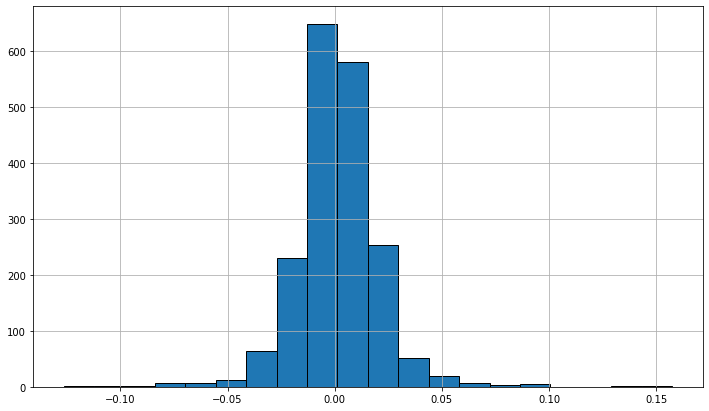

In [116]:
# 일별 수익률 계산
amzn_daily_return = amzn_df['Close'].pct_change(periods=1)
amzn_daily_return.dropna(inplace=True)
amzn_daily_return.hist(bins=20, edgecolor='k', figsize=[12, 7])
plt.show()

In [115]:
# 평균으로부터 n sigma 범위에 있는 데이터 분포
# 68-95-99
std = amzn_daily_return.std()
mean = amzn_daily_return.mean()

# z-score: 평균으로부터 떨어진 거리에 대한 표준편차의 배수
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

pcts = [abs_z_score.lt(i) for i in range(1, 4)]  # lt: < 
for i in range(3):
    print(f' within {i+1} std ratio: {pcts[i].mean()}')
    
# 정규분포에 비해 꼬리가 얇고 가운데가 두껍다.

 within 1 std ratio: 0.7873350923482849
 within 2 std ratio: 0.9562005277044855
 within 3 std ratio: 0.9846965699208443


## query 메서드를 이용한 불리언 인덱싱 가독성 개선

## where 메서드를 이용한 Series 보존

## DataFrame 행 마스크

## 불리언, 정수 위치, 레이블을 사용한 선택